# SKFlow Simple Linear Regression on Parkinson's Disease Speech Dataset

https://archive.ics.uci.edu/ml/datasets/Parkinson+Speech+Dataset+with++Multiple+Types+of+Sound+Recordings

In [1]:
%matplotlib inline
import pandas as pd
import tensorflow as tf
import tensorflow.contrib.learn.python.learn as skflow
from sklearn import datasets, metrics
import numpy as np
import matplotlib.pyplot as pp
import os.path
import pickle

In [4]:
### show label distribution
def plot_labelDistribution(df,col):
    te = df[col].sort_values().unique()
    val = 0. # this is the value where you want the data to appear on the y-axis.
    ar = np.arange(len(te)) # just as an example array
    pp.plot(te, np.zeros_like(ar) + val, 'x')
    pp.show()

### Converting Data into Tensors
def convert_dataframe(dataframe, colnames, labelcol):
    X = np.array(dataframe[colnames].iloc[:,]).astype(np.float32)
    Y = np.array(dataframe[labelcol].iloc[:,]).astype(np.float32)  
    return X, Y

### load or generate random ids for test and training sets
def slice_ids(length,run_id):
    idfile = "models/"+run_id+"_ids"
    if os.path.isfile(idfile): 
        ### Re-run model
        with open(idfile, 'rb') as fp:
            randomInd = pickle.load(fp)
    else:
        ### First run
        randomInd = np.random.permutation(length)
        with open(idfile, 'wb') as fp:
            pickle.dump(randomInd, fp)
    
    ###  70% of ids randomly selected for training
    ###  30% of ids randomly selected for testing
    mid = int(.7*length)
    trainidx = randomInd[:mid]
    testidx = randomInd[mid:]
    return trainidx, testidx

def run_LinearRegressor(run_id, steps = 100):
    ### Get Training and Testing indexes
    trainidx, testidx = slice_ids(len(X),run_id)

    ### Define classifier - Simple Linear Regression
    ### model_dir - this is where the model is saved. To re-run use the same runIdentifier
    feature_columns = skflow.infer_real_valued_columns_from_input(X)
    model = skflow.LinearRegressor(
        feature_columns=feature_columns,
        model_dir="models/SLR/"+run_id,
        enable_centered_bias=False)
    
    model.fit(X[trainidx,:], 
              Y[trainidx],#.astype(np.int), 
              steps=steps)
    
    y_p = model.predict(X[testidx,:])
    y_t = Y[testidx]
    return np.linalg.norm(y_t-y_p)/y_t.shape[0]

# Load data and convert to tensors

In [2]:
COLUMN_NAMES = ["subject_id", "jitter_local", "jitter_local_absolute", "jitter_rap", "jitter_ppq5",
                 "jitter_ddp","shimmer_local","shimmer_local_db","shimmer_apq3","shimmer_apq5",
                 "shimmer_apq11","shimmer_dda","ac","nth","htn","pitch_median","pitch_mean","pitch_stddev",
                 "pitch_min","pitch_max","number_of_pulses", "number_of_periods", "period_mean",
                 "period_stddev","locally_unvoiced_frames_fraction","number_of_voice_breaks",
                 "degree_of_voice_breaks","updrs","class_information"]

datafile = "data/train_data.txt"
df_data = pd.read_csv(datafile, names=COLUMN_NAMES, header=None)

### Create list of column names for feature data.
featcol = list(df_data.columns.values)
featcol.remove("subject_id")
featcol.remove("class_information")
featcol.remove("updrs")

### First Model fitting UPDRS - SLR

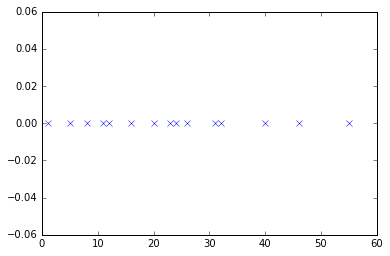

In [5]:
labelcol = "updrs" 
X, Y = convert_dataframe(df_data, featcol, labelcol)
plot_labelDistribution(df_data,labelcol)

In [5]:
%%time
print "Average Error: {0}".format(run_LinearRegressor("SLR_UPDRS_001", 10000))

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.


Average Error: 0.838205190805
CPU times: user 25.3 s, sys: 2.75 s, total: 28.1 s
Wall time: 23.6 s


In [6]:
%%time
print "Average Error: {0}".format(run_LinearRegressor("SLR_UPDRS_002", 10000))

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.


Average Error: 0.851975367619
CPU times: user 24.5 s, sys: 2.63 s, total: 27.1 s
Wall time: 22.8 s


In [7]:
%%time
print "Average Error: {0}".format(run_LinearRegressor("SLR_UPDRS_003", 10000))

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.


Average Error: 0.859457651774
CPU times: user 24.4 s, sys: 2.59 s, total: 27 s
Wall time: 22.7 s


In [8]:
%%time
print "Average Error: {0}".format(run_LinearRegressor("SLR_UPDRS_004", 10000))

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.


Average Error: 0.801409794734
CPU times: user 24.4 s, sys: 2.63 s, total: 27 s
Wall time: 22.6 s


# Use Models to predict UPDRS Scores for the Test patients - No way to verify

In [9]:
def predictValues(run_id, testX):
    ### Define classifier - Simple Linear Regression
    ### model_dir - this is where the model is saved. To re-run use the same runIdentifier
    feature_columns = skflow.infer_real_valued_columns_from_input(X)
    model = skflow.LinearRegressor(
        feature_columns=feature_columns,
        model_dir="models/SLR/"+run_id,
        enable_centered_bias=False)

    y_p = model.predict(testX)
    return y_p    

In [10]:
COLUMN_NAMES = ["subject_id", "jitter_local", "jitter_local_absolute", "jitter_rap", "jitter_ppq5",
                 "jitter_ddp","shimmer_local","shimmer_local_db","shimmer_apq3","shimmer_apq5",
                 "shimmer_apq11","shimmer_dda","ac","nth","htn","pitch_median","pitch_mean","pitch_stddev",
                 "pitch_min","pitch_max","number_of_pulses", "number_of_periods", "period_mean",
                 "period_stddev","locally_unvoiced_frames_fraction","number_of_voice_breaks",
                 "degree_of_voice_breaks","class_information"]

datafile = "data/test_data.txt"
df_data = pd.read_csv(datafile, names=COLUMN_NAMES, header=None)

featcol = list(df_data.columns.values)
featcol.remove("subject_id")
featcol.remove("class_information")
testData = np.array(df_data[featcol].iloc[:,]).astype(np.float32)

In [11]:
%%time
predictValues("SLR_UPDRS_004", testData)

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.


CPU times: user 62.8 ms, sys: 2.38 ms, total: 65.2 ms
Wall time: 63 ms


array([  9.83985233,  11.33826542,  10.86571407,  12.86453915,
        13.14043331,  12.29812527,  11.14152813,  10.75028515,
         9.73122501,  12.83628464,  11.49466038,  12.15018082,
        11.05200672,  14.96885967,   9.77010632,   5.57711983,
         8.49628735,   7.99481201,   7.80993938,   9.69421864,
        14.11774826,   6.86259937,   9.37899494,  15.71418095,
         3.56271839,   6.71672344,  16.25206375,  18.4925251 ,
         8.69020939,  13.27634525,   6.82678032,   9.52336025,
         7.05559063,   9.66985989,   9.77999401,  10.66525364,
         8.63033962,   8.80997181,   7.85279751,   9.56865215,
        11.68294048,  11.12195301,  12.56541538,  11.3822422 ,
        12.6327219 ,  11.73091793,  10.05574608,  12.06821537,
        11.20923519,   9.75643826,  10.79298496,  11.81182957,
        10.38191319,  10.58582306,  10.37497616,  10.37497616,
        14.17206097,  10.64422894,  10.5246439 ,   9.27067184,
         9.2663908 ,   9.2516489 ,   9.44782734,  10.36

In [12]:
%%time
predictValues("SLR_UPDRS_001", testData)

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.


CPU times: user 65.1 ms, sys: 2.64 ms, total: 67.7 ms
Wall time: 65.4 ms


array([ 10.61427593,  12.27134514,  11.7271204 ,  13.85637951,
        14.15016651,  13.30985165,  11.25522709,  10.64565945,
         9.71624088,  13.14261627,  11.66380978,  12.39119625,
        11.53330708,  14.51761341,   9.76466942,   5.69794559,
         9.03184986,   8.98165035,   7.81007719,   9.86635303,
        13.79660034,   7.54464865,  10.18355942,  14.41017628,
         6.18338299,   8.14276791,  15.02574062,  17.43081474,
         8.7367115 ,  12.88760185,   7.32179976,   9.6551609 ,
         7.64626169,  10.43942261,  10.52270031,  11.50682545,
         9.37666225,   9.53766346,   8.71421146,  10.57332134,
        10.50919056,   9.7977953 ,  13.13465977,  11.542593  ,
        13.22173977,  11.68647957,  10.57450962,  12.68679714,
        11.58792782,  10.01759815,  11.12138081,  12.08946514,
        10.62017536,  10.83692265,  10.46521473,  10.46521473,
        13.46115208,  11.25106716,  10.79948711,   9.72984409,
        10.37658596,  10.33840656,  10.38538456,  11.51